## Importando as bibliotecas

 - Para conectar aos dados foi utilizada a API do Yahoo Finanças.

In [1]:
import yfinance as yf
import pandas as pd
import datetime as dt
import json
import numpy as np
import matplotlib.pyplot as plt

### Fazendo leitura dos dados 

In [2]:
stock = yf.Ticker('ABEV3.SA')

In [3]:
print(stock.info)

{'zip': '04530-001', 'sector': 'Consumer Defensive', 'fullTimeEmployees': 50000, 'longBusinessSummary': "Ambev S.A., through its subsidiaries, produces, distributes, and sells beer, draft beer, carbonated soft drinks (CSD), other non-alcoholic beverages, malt, and food products in the Americas. It operates through three segments: Brazil; Central America and the Caribbean; Latin America South; and Canada. The company offers beer primarily under the Skol, Brahma, Antarctica, Brahva, Brahva Gold, Extra, Budweiser, Bud Light, Stella Artois, Corona, Modelo Especial, Beck, Leffe, Hoegaarden, Bucanero, Cristal, Mayabe, Cacique, Presidente, Brahma Light, President Light, Bohemia, The One, Banks, Deputy, Quilmes ClÃ¡sica, PaceÃ±a, TaquiÃ±a, Huari, Becker, CusqueÃ±a, Pilsen, Ouro Fino, Patricia, Michelob Ultra, Busch, Labatt Blue, Alexander Keith's, and Kokanee brands. It also provides bottled water, isotonic beverages, energy drinks, coconut water, powdered and natural juices, and ready-to-drin

In [4]:
# Buscando dados dos últimos 2 anos com granularidade diária
df = stock.history(period='2y', interval='1d', 
                          start=None, end=None)

### Funcionalidades da API

In [5]:
# Lista os ultimos dividendos pagos
stock.dividends.tail(8)

Date
2019-12-20    0.4906
2020-12-18    0.4137
2021-01-14    0.0767
Name: Dividends, dtype: float64

- Para ambev não existem recomendações de compra e venda, logo, vamos utilizar a ação da empresa ZOOM da bolsa americana 

In [6]:
# Recomendações sobre a ação
stock_rec = yf.Ticker('ZM')
stock_rec.recommendations

Firm    To Grade From Grade Action
Date                                                                    
2019-04-22 13:29:45  Summit Insights Group        Sell              init
2019-04-30 10:42:50              Bernstein  Outperform              init
2019-04-30 12:30:54             Rosenblatt     Neutral              init
2019-05-13 10:42:22          Piper Jaffray  Overweight              init
2019-05-13 10:43:27              JP Morgan  Overweight              init
...                                    ...         ...        ...    ...
2021-06-02 12:03:28          Piper Sandler  Overweight              main
2021-06-02 12:04:34                    UBS     Neutral              main
2021-06-02 12:19:48          Deutsche Bank        Hold              main
2021-06-02 12:26:08                   BTIG         Buy              main
2021-06-02 13:09:12              JP Morgan     Neutral              main

[108 rows x 4 columns]

In [7]:
# Pra quando existem opções de compra pra ação.
stock_rec.options

('2021-06-11',
 '2021-06-18',
 '2021-06-25',
 '2021-07-02',
 '2021-07-09',
 '2021-07-16',
 '2021-07-23',
 '2021-08-20',
 '2021-09-17',
 '2021-11-19',
 '2022-01-21',
 '2022-06-17',
 '2023-01-20')

<AxesSubplot:xlabel='Date'>

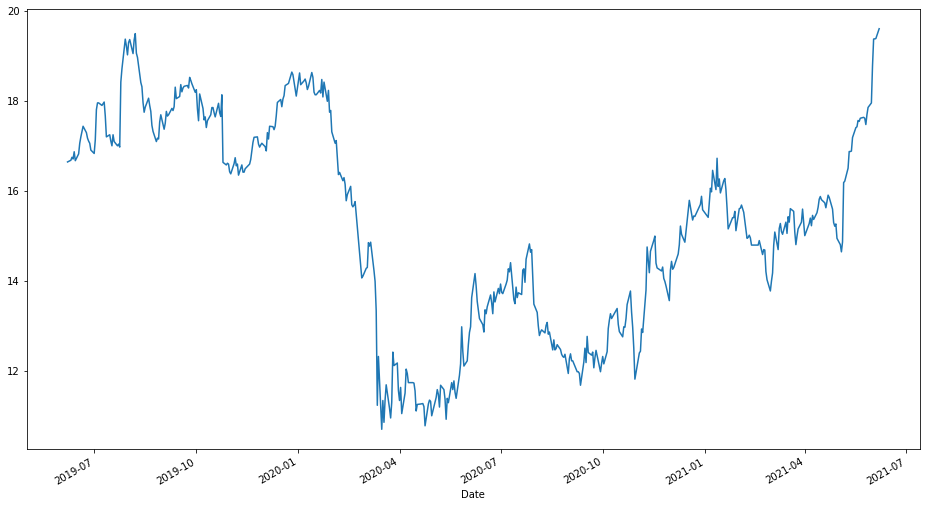

In [8]:
# Verificando o preço de fechamento da ação
df['Close'].plot(figsize=(16,9))

## Simple moving average 

In [9]:
def SMA(df, periods=[20]):
    for i in periods:
        df['SMA' + str(i)] = df['Close'].rolling(window=i).mean()
    return df

In [10]:
df = SMA(df, [10, 20, 50, 100])

In [11]:
df

Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2019-06-07  16.723043  16.798627  16.609665  16.638010  11447300        0.0   
2019-06-10  16.638011  16.912003  16.628563  16.675802  14089900        0.0   
2019-06-11  16.704146  16.959244  16.619114  16.741938  24719200        0.0   
2019-06-12  16.741937  16.808075  16.467944  16.704145  21035200        0.0   
2019-06-13  16.723043  16.968691  16.713595  16.864763  17586300        0.0   
...               ...        ...        ...        ...       ...        ...   
2021-05-31  17.740000  17.950001  17.709999  17.950001  10102100        0.0   
2021-06-01  17.990000  18.980000  17.920000  18.770000  60016600        0.0   
2021-06-02  18.770000  19.660000  18.620001  19.370001  60424800        0.0   
2021-06-04  19.299999  19.459999  19.059999  19.379999  33841600        0.0   
2021-06-07  19.320000  19.820000  19.190001  19.600000  27857800        0.0   

            Stock Splits   SMA10    SMA20    SMA50     SMA100  
Date                                                           
2019-06-07             0     NaN      NaN      NaN        NaN  
2019-06-10             0     NaN      NaN      NaN        NaN  
2019-06-11             0     NaN      NaN      NaN        NaN  
2019-06-12             0     NaN      NaN      NaN        NaN  
2019-06-13             0     NaN      NaN      NaN        NaN  
...                  ...     ...      ...      ...        ...  
2021-05-31             0  17.633  16.9960  16.0352  15.657578  
2021-06-01             0  17.768  17.2025  16.0986  15.691212  
2021-06-02             0  17.949  17.4280  16.1752  15.727562  
2021-06-04             0  18.133  17.5880  16.2612  15.760827  
2021-06-07             0  18.332  17.7575  16.3572  15.797088  

[492 rows x 11 columns]

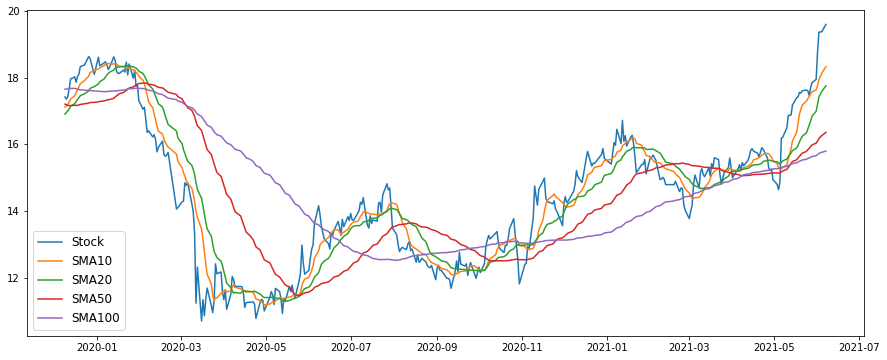

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(df['Close'][-365:], label='Stock')
plt.plot(df['SMA10'][-365:], label='SMA10')
plt.plot(df['SMA20'][-365:], label='SMA20')
plt.plot(df['SMA50'][-365:], label='SMA50')
plt.plot(df['SMA100'][-365:], label='SMA100')
plt.legend(loc='lower left', fontsize=12)


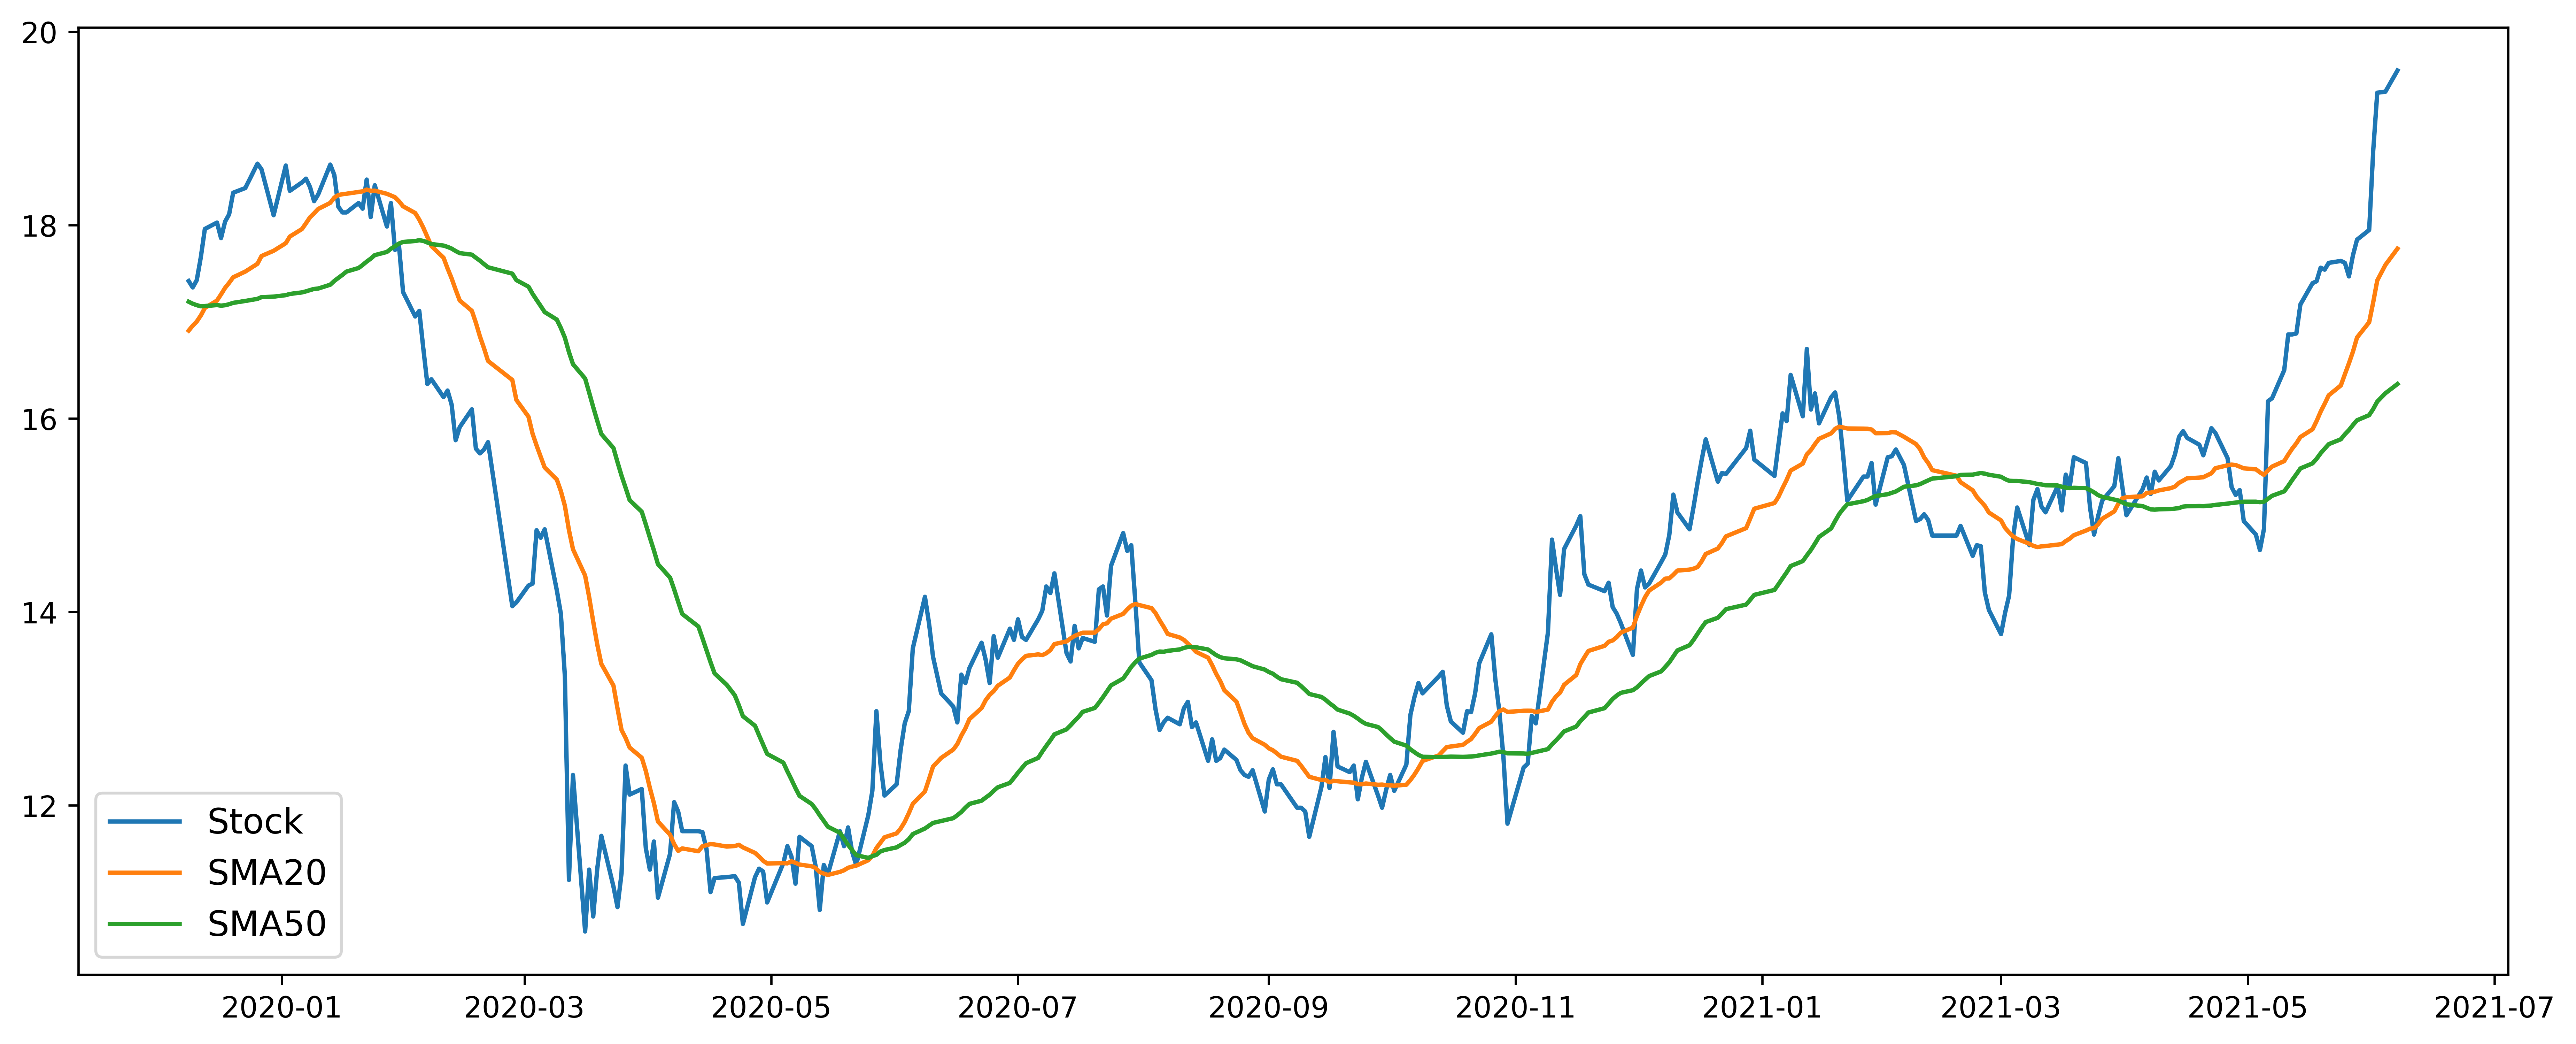

In [13]:
# Somente SMA20 e 50
plt.figure(figsize=(15, 6), dpi=600)
plt.plot(df['Close'][-365:], label='Stock')
plt.plot(df['SMA20'][-365:], label='SMA20')
plt.plot(df['SMA50'][-365:], label='SMA50')
plt.legend(loc='lower left', fontsize=12)

# Exponential moving averages

In [14]:
def EMA(df, periods=[20]):
    for i in periods:
        df['EMA' + str(i)] =  df['Close'].ewm(span=i,adjust=False).mean()
    return df

In [15]:
df = EMA(df,[10,20,50,100])

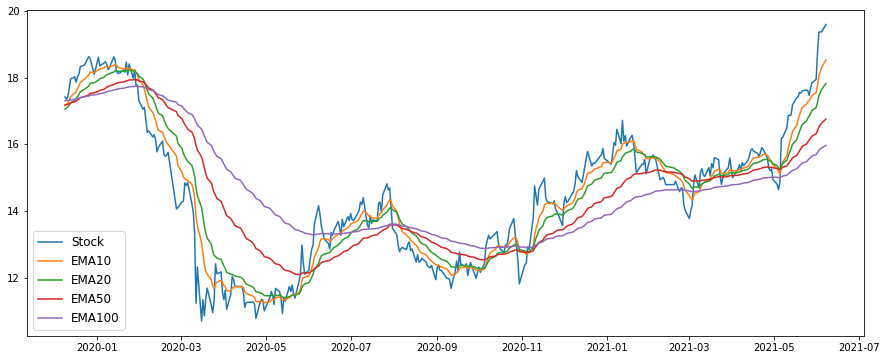

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(df['Close'][-365:], label='Stock')
plt.plot(df['EMA10'][-365:], label='EMA10')
plt.plot(df['EMA20'][-365:], label='EMA20')
plt.plot(df['EMA50'][-365:], label='EMA50')
plt.plot(df['EMA100'][-365:], label='EMA100')
plt.legend(loc='lower left', fontsize=12)

### Comparando SMA e EMA

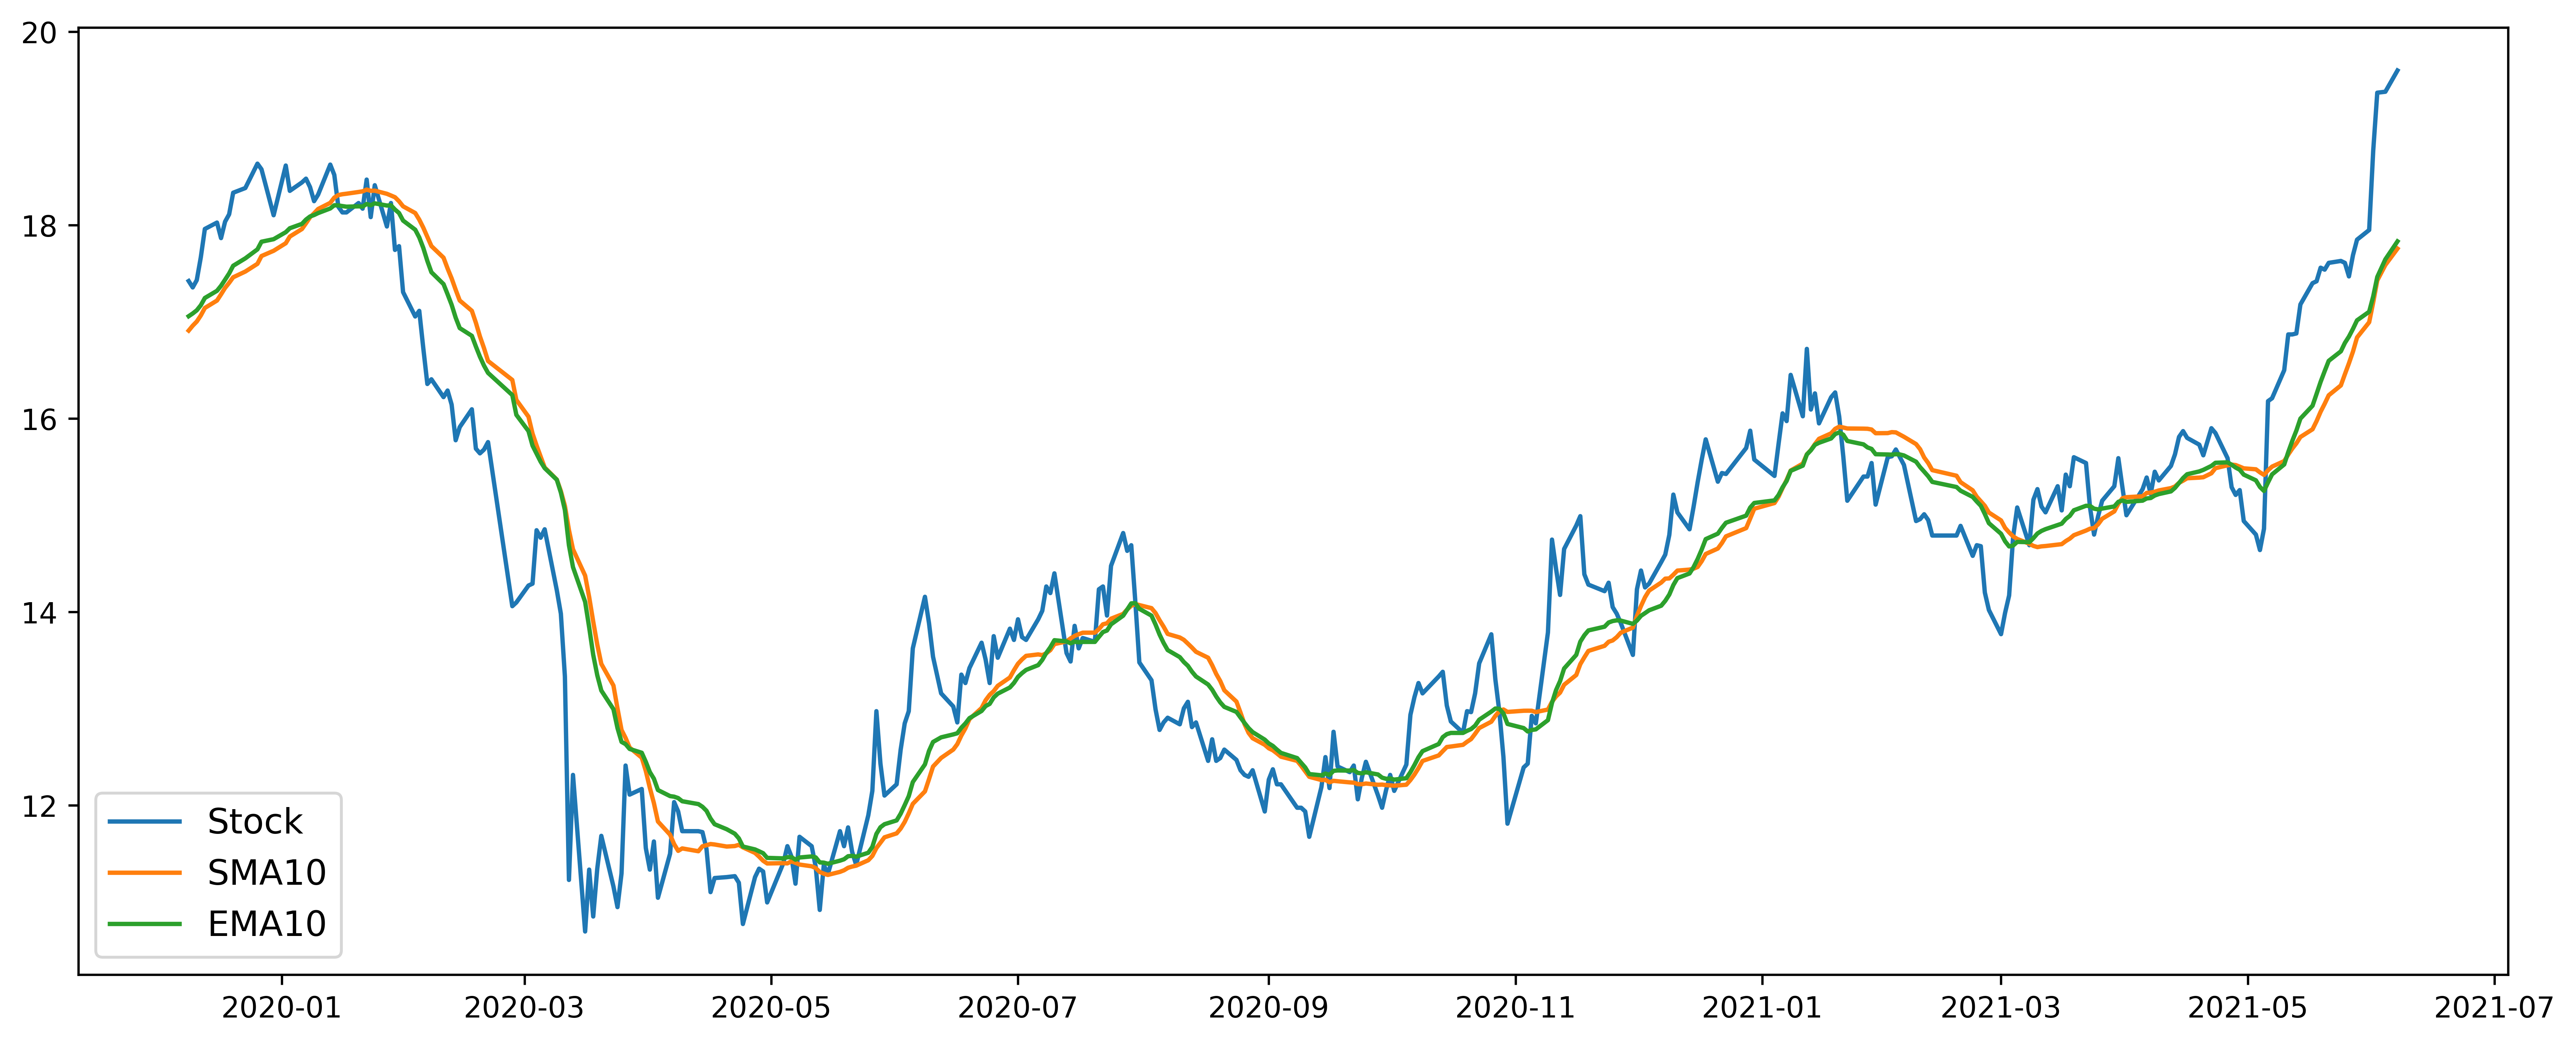

In [17]:
plt.figure(figsize=(15, 6), dpi=600)
plt.plot(df['Close'][-365:], label='Stock')
plt.plot(df['SMA20'][-365:], label='SMA10')
plt.plot(df['EMA20'][-365:], label='EMA10')
plt.legend(loc='lower left', fontsize=12)

### Criando estratégia de compra e venda usando EMA

In [18]:
df = EMA(df,[12,26])

In [19]:
df['MACD'] = df['EMA12'] - df['EMA26']

 - Criando a curva MACD

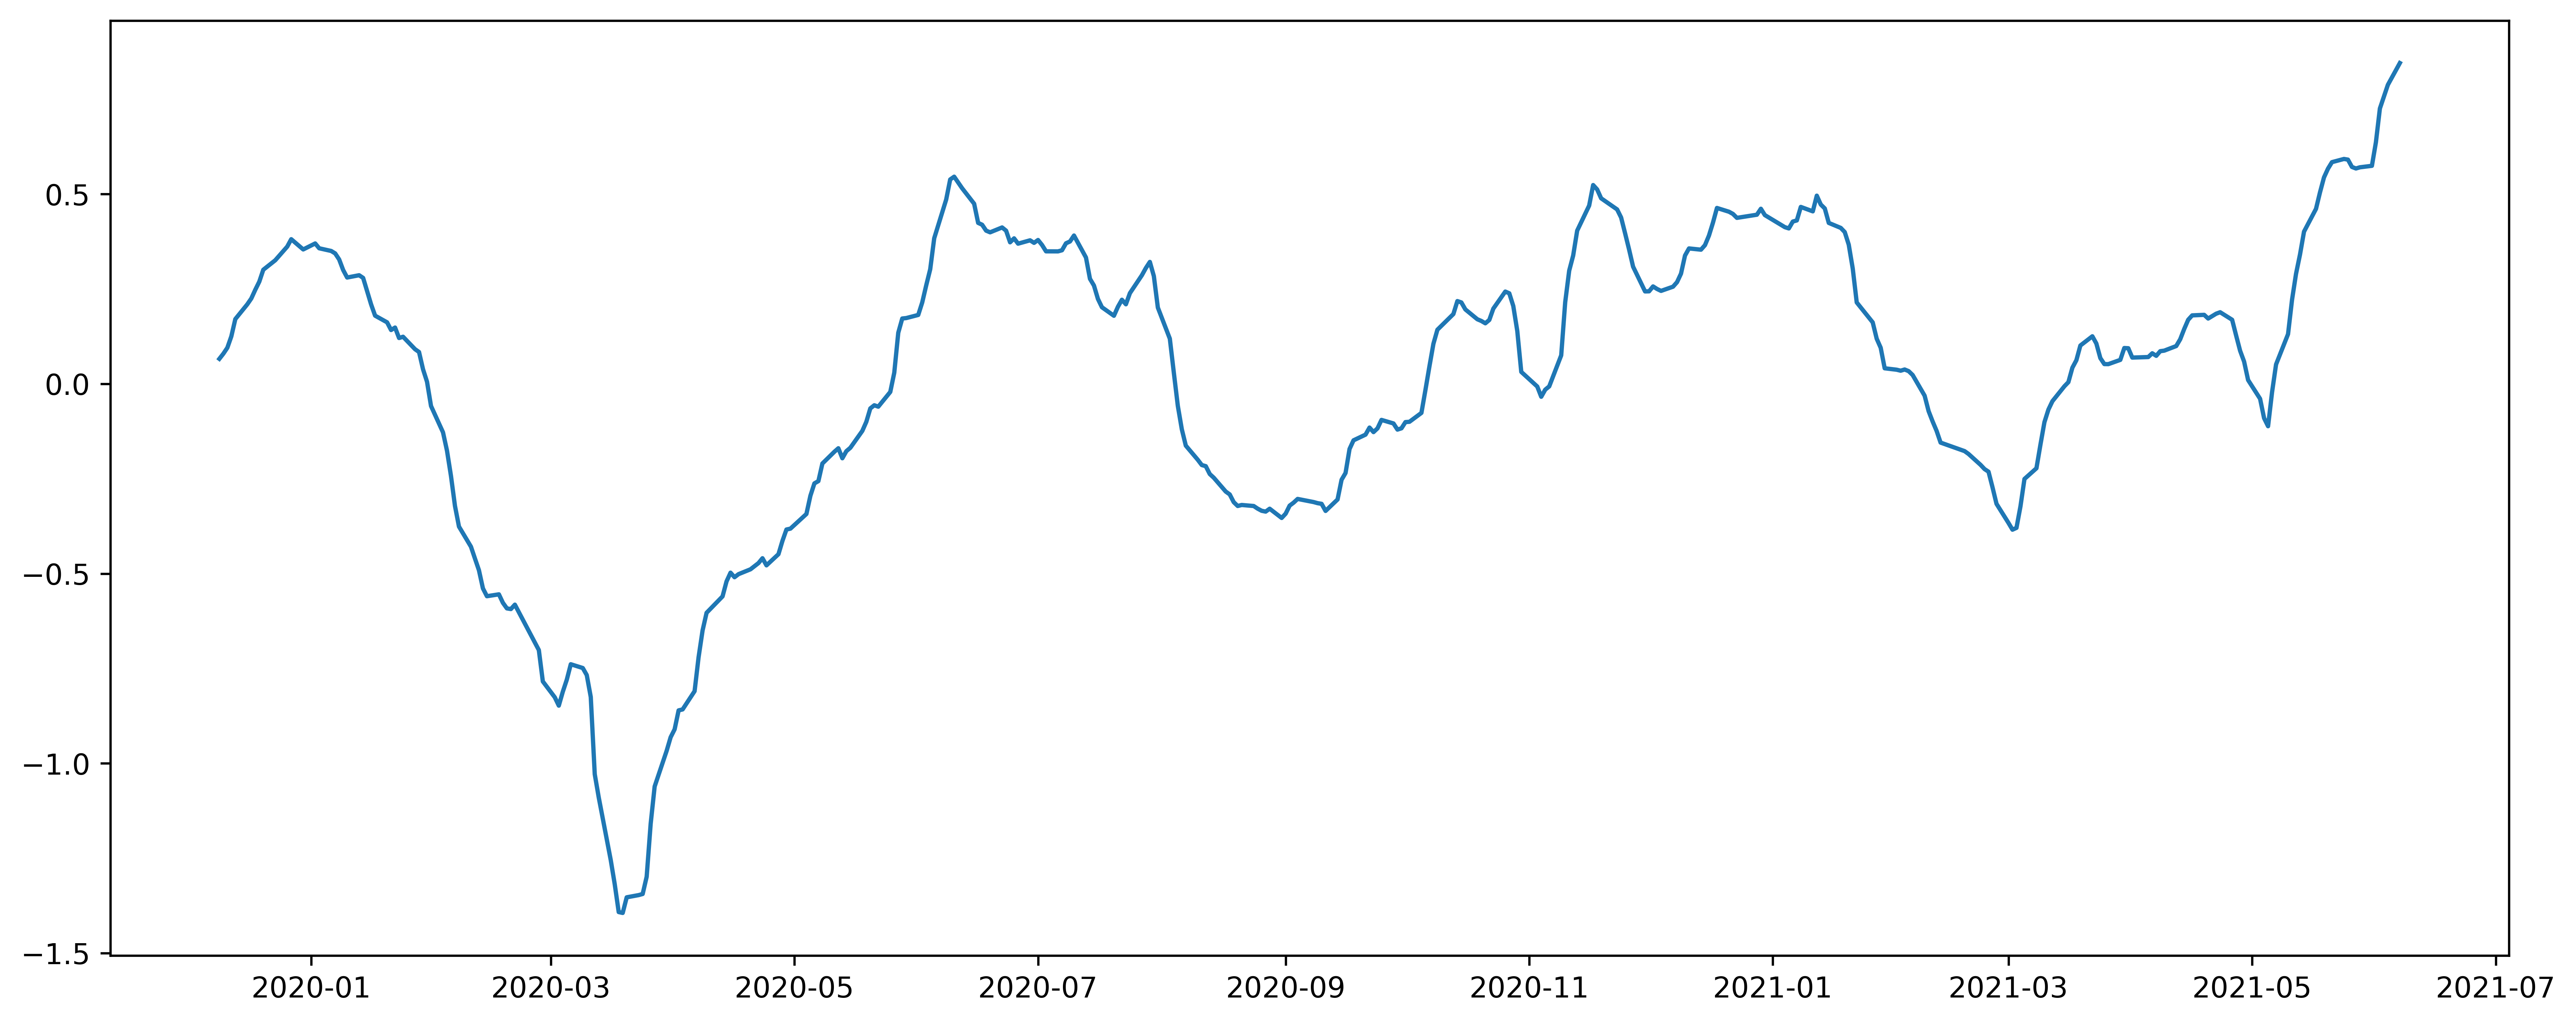

In [20]:
plt.figure(figsize=(15, 6), dpi=600)
plt.plot(df['MACD'][-365:], label='MACD')

In [21]:
# Coloca True nos pontos onde a EMA12 é maior que a 26
df['EMA12xEMA26'] = df['EMA12'] > df['EMA26']

In [22]:
# Marca os pontos onde as curvas se cruzaram
df['cross_EMA12xEMA26'] = np.where(df['EMA12xEMA26'] == df['EMA12xEMA26'].shift(1), False, True)

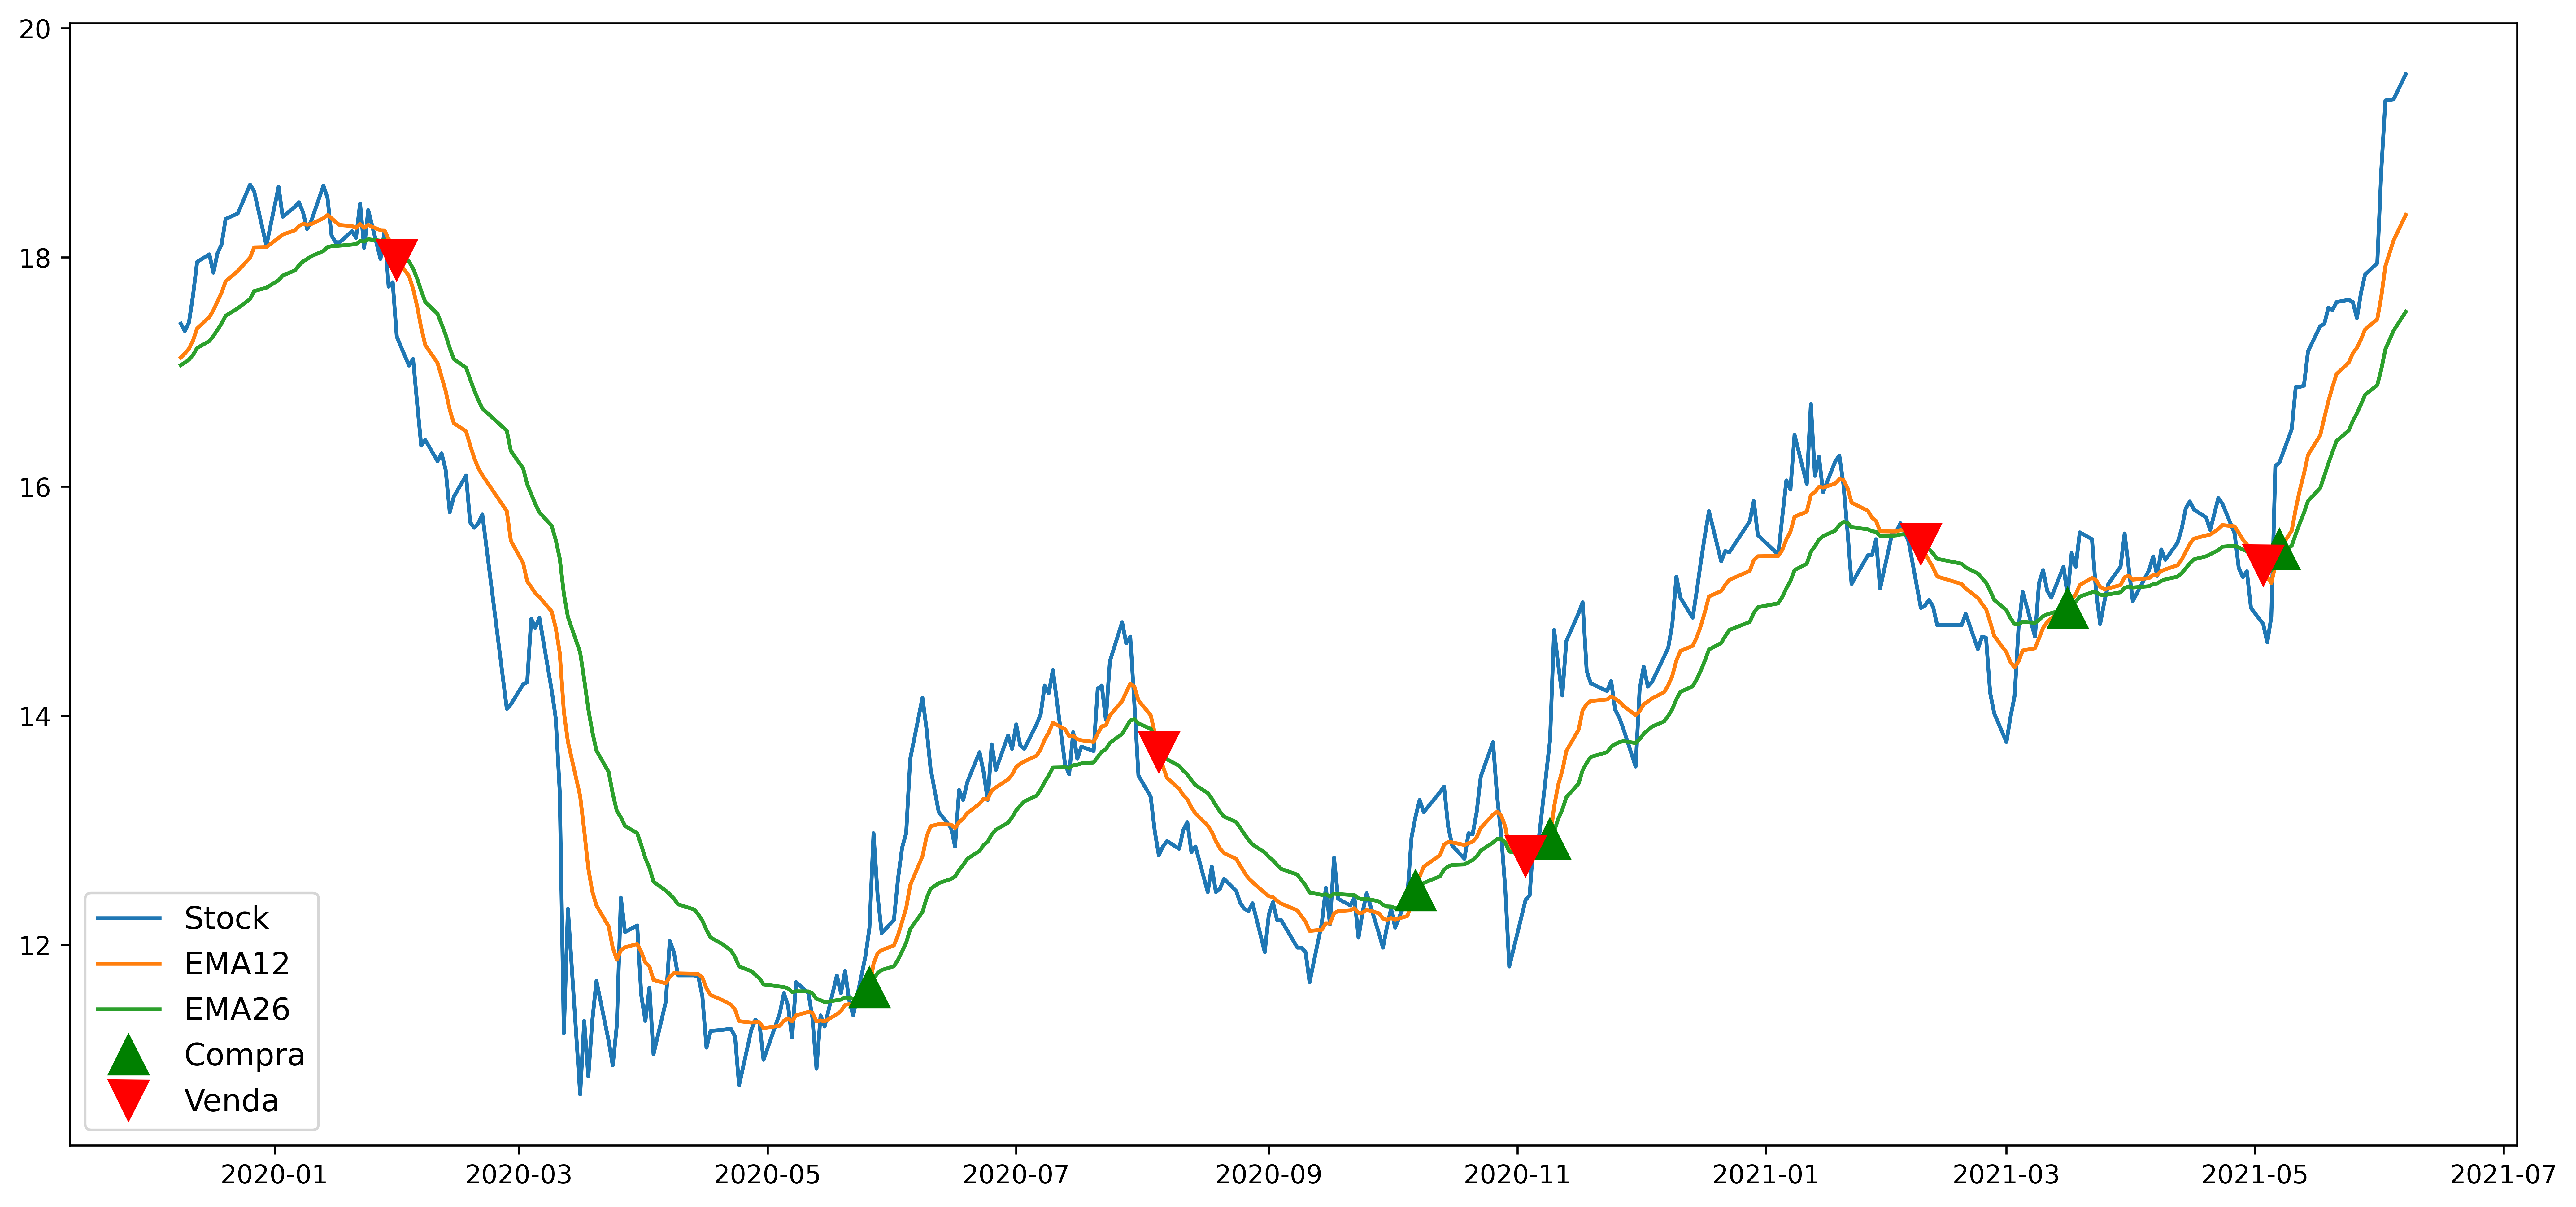

In [23]:
# Plota a estratégia de compra e venda
plt.figure(figsize=(17, 8), dpi=600)
plt.plot(df['Close'][-365:], label='Stock')
plt.plot(df['EMA12'][-365:], label='EMA12')
plt.plot(df['EMA26'][-365:], label='EMA26')
plt.legend(loc='lower left', fontsize=12)

# Markers de compra e venda
plt.plot(df['EMA12'][-365:][(df['cross_EMA12xEMA26'] == True) & (df['EMA12xEMA26'] == True) ],
        '^', markersize=15, color='g', label='Compra')
plt.plot(df['EMA12'][-365:][(df['cross_EMA12xEMA26'] == True) & (df['EMA12xEMA26'] == False) ],
        'v', markersize=15, color='r', label='Venda')
plt.legend(loc='lower left', fontsize=12)

# Outros indicadores

In [24]:
import talib as ta

#### Análise de Bollinger
O objetivo da Análise de Bollinger é para demonstrar uma definição relativa de altos e baixos do ativo. Quando o preço está próximo da banda superior quer dizer que o preço está alto, e vice-versa. Esta análise permite chegar a decisões sistemáticas de compra e venda de ações

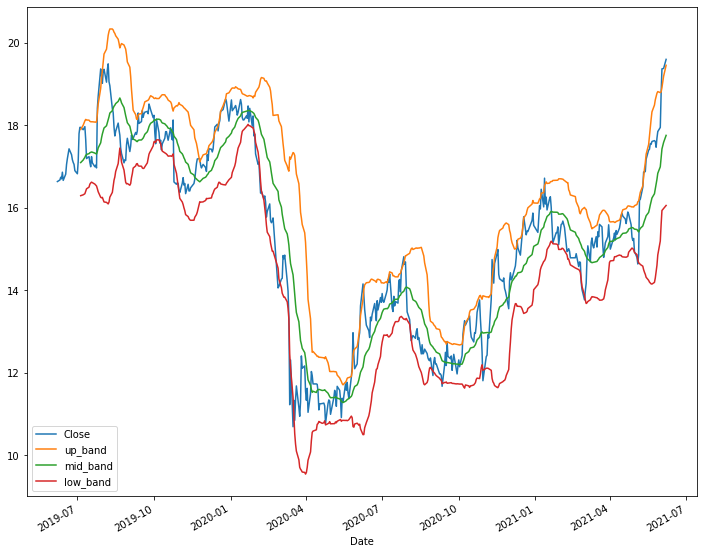

In [25]:
df['up_band'], df['mid_band'], df['low_band'] = ta.BBANDS(df['Close'], timeperiod =20)
df[['Close','up_band','mid_band','low_band']].plot(figsize=(12,10))
plt.show()

#### RSI
Termômetro do cansaço do mercado, medindo se ele já subiu ou caiu muito e precisa tomar fôlego antes de continuar na mesma tendência. Tradicionalmente, o IFR é considerado superavaliado quando acima de 70 e subavaliado abaixo de 30.

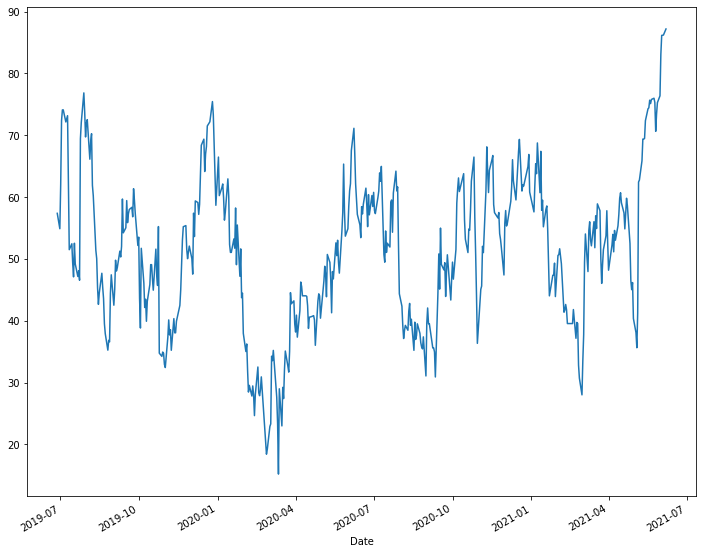

In [26]:
df['Relative'] = ta.RSI(df['Close'],14)
df['Relative'].plot(figsize=(12,10))
plt.show()

# Padrões de candle

In [27]:
opendata = df['Open'].values
closedata = df['Close'].values
lowdata = df['Low'].values
highdata = df['High'].values
            
#Hammer
df['hammer'] = ta.CDLHAMMER(opendata, highdata , lowdata, closedata) #subida e descida

#Engulfing
df['gulfing'] = ta.CDLENGULFING(opendata, highdata , lowdata, closedata)#subida e descida


In [28]:
ta.CDLENGULFING(opendata, highdata , lowdata, closedata)

array([   0,    0,    0,    0,    0, -100,    0,    0,    0,    0,    0,
          0,    0,    0, -100,    0,  100,    0,    0,    0, -100,    0,
       -100,    0,    0,    0,    0,    0,    0,    0,    0, -100,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, -100,
          0,    0,    0,    0,    0,    0,    0, -100,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  100,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  100,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  100,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, -100,    0,    0,    0,    0,  100,    0,    0,    0,    0,
        100,    0, -100,    0,    0,    0,    0,   

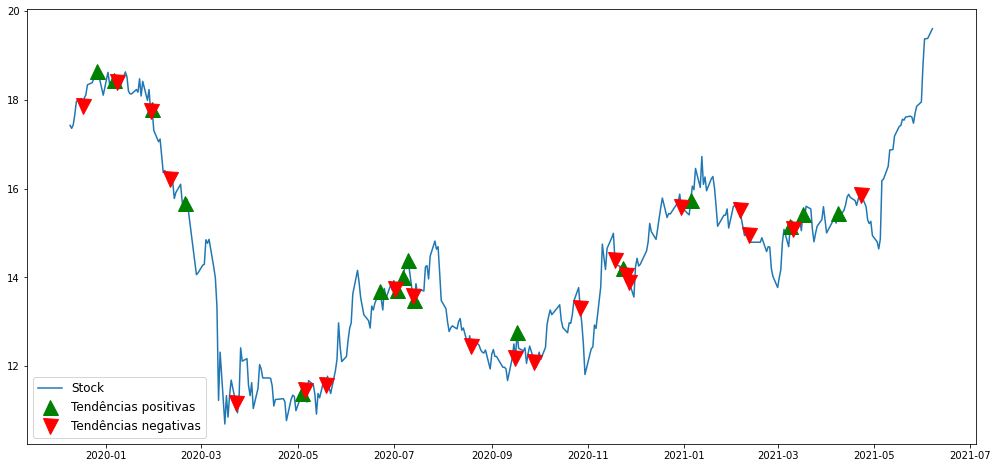

In [29]:
plt.figure(figsize=(17, 8))
plt.plot(df['Close'][-365:], label='Stock')
plt.legend(loc='lower left', fontsize=12)
plt.plot(df['Close'][-365:][(df['hammer'] > 0) | (df['gulfing'] > 0)],
        '^', markersize=15, color='g', label='Tendências positivas')
plt.plot(df['Close'][-365:][(df['hammer'] < 0) | (df['gulfing'] < 0) ],
        'v', markersize=15, color='r', label='Tendências negativas')
plt.legend(loc='lower left', fontsize=12)

In [30]:
import plotly.graph_objects as go
import pandas as pd
df['Marker'] = df['Close'] + 2
fig = go.Figure(data=[go.Candlestick(x=df[-365:].index,
                open=df['Open'][-365:], high=df['High'][-365:],
                low=df['Low'][-365:], close=df['Close'][-365:],
                                    name='Gráfico de velas')
                
                     ])
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=df['Marker'][-365:][(df['hammer'] > 0) | (df['gulfing'] > 0)].index,
        y=df['Marker'][-365:][(df['hammer'] > 0) | (df['gulfing'] > 0)],
        marker=dict(
            color='Green',
            size=10
        ),
        name='Tendência de subida',
        marker_symbol='triangle-up'
    )
)
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=df['Marker'][-365:][(df['hammer'] < 0) | (df['gulfing'] < 0)].index,
        y=df['Marker'][-365:][(df['hammer'] < 0) | (df['gulfing'] < 0)],
        marker=dict(
            color='Red',
            size=10,
        ),
        name='Tendência de descida',
        marker_symbol='triangle-down'
    )
)
fig.show()

# Aplicando Heikin Ashi

In [31]:
df['Close_Heikin'] = (df['Open'] +  df['Close'] + df['High'] + df['Low'])/4
df['Open_Heikin'] = df['Open'].shift(1)
df['Open_Heikin'] = (df['Open_Heikin'].shift(1) +  df['Close_Heikin'].shift(1))/2

In [62]:
df['Low_Heikin'] = df[['Low','Open_Heikin','Close_Heikin']].min(axis=1)
df['High_Heikin'] = df[['High','Open_Heikin','Close_Heikin']].max(axis=1)

In [63]:
import plotly.graph_objects as go
import pandas as pd
fig = go.Figure(data=[go.Candlestick(x=df[-365:].index,
                open=df['Open_Heikin'][-365:], high=df['High_Heikin'][-365:],
                low=df['Low_Heikin'][-365:], close=df['Close_Heikin'][-365:],
                                    name='Gráfico de velas')
                
                     ])
fig.show()

# Arima model

In [34]:
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Encontrando as dimensões p, d e q

### Dimensão do MA

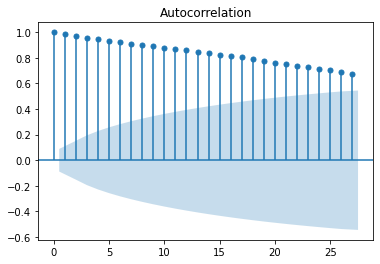

In [36]:
plot_acf(df['Close'])
plt.show()

### Dimensão do AR

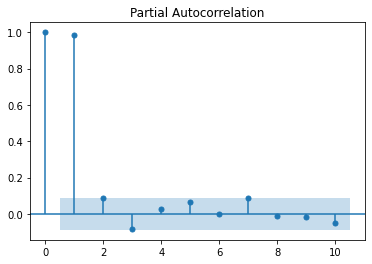

In [37]:
plot_pacf(df['Close'], lags=10)
plt.show()

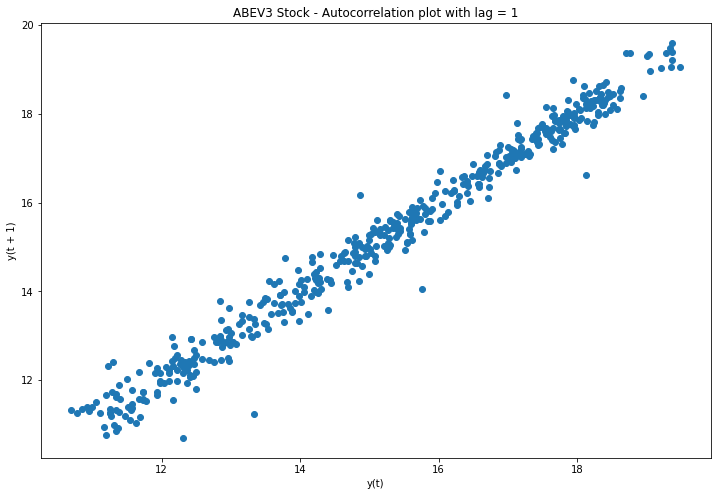

In [38]:
plt.figure(figsize=(12, 8))
lag_plot(df['Close'], lag=1)
plt.title('ABEV3 Stock - Autocorrelation plot with lag = 1')
plt.show()

### Dimensão do I

<AxesSubplot:xlabel='Date'>

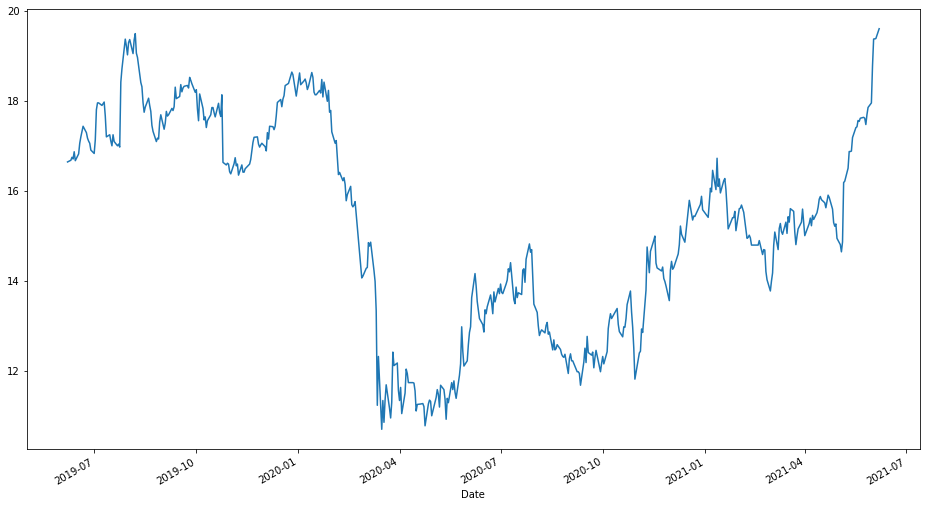

In [39]:
df['Close'].plot(figsize=(16,9))

In [40]:
df['new_avg'] = df['Close'] - df['Close'].shift(1)

<AxesSubplot:xlabel='Date'>

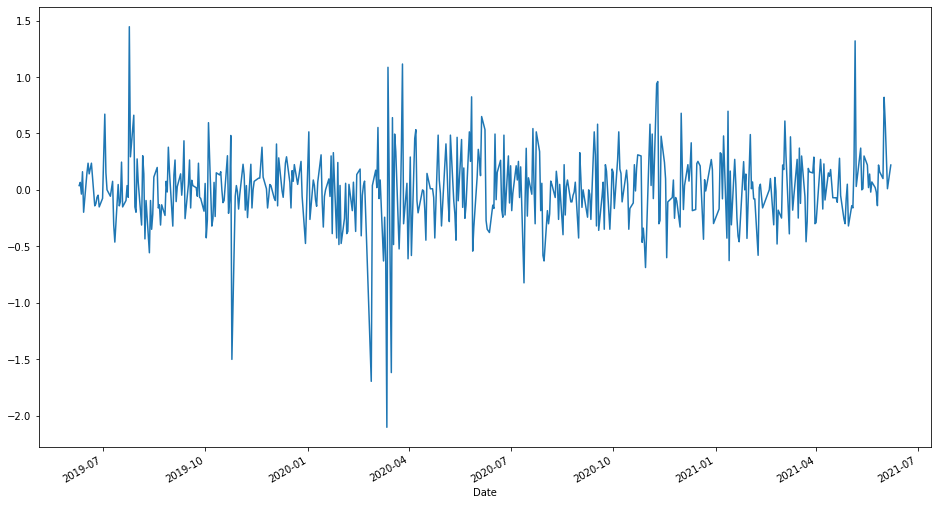

In [41]:
df['new_avg'].plot(figsize=(16,9))

### Criando a modelagem

In [42]:
# Separando treino e teste
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]

In [43]:
training_data = train_data['Close'].values
test_data = test_data['Close'].values

In [44]:
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
# Processo de retreinamento após atualização de cada nova observação no tempo
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
# MSE
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.09150742119719711


### Visualização da predição

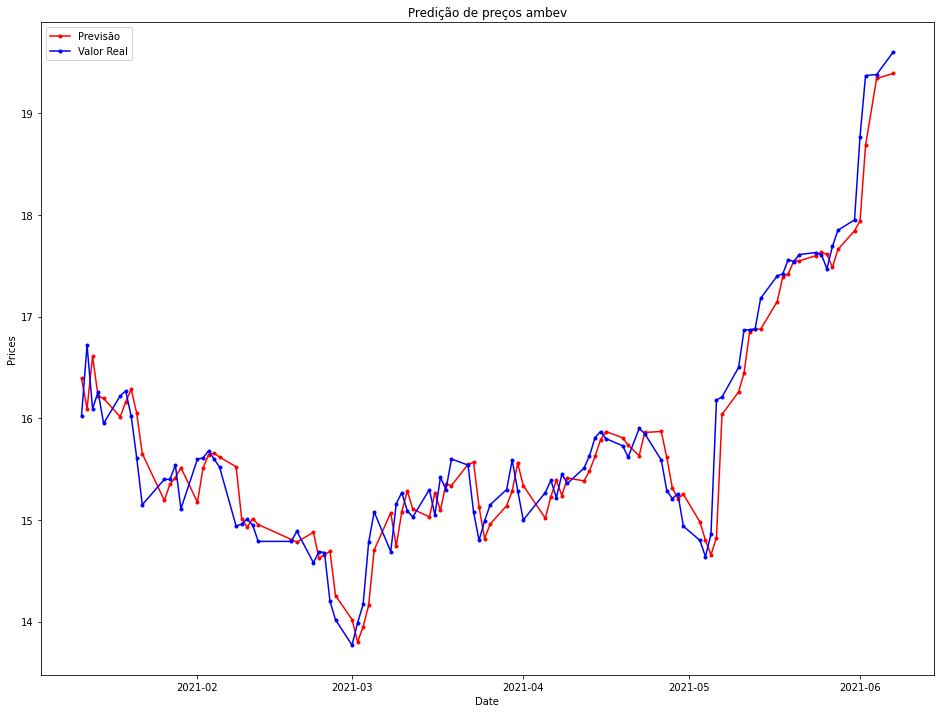

In [45]:
plt.figure(figsize=(16, 12))
test_set_range = df[int(len(df)*0.8):].index
plt.plot(test_set_range, model_predictions, color='red', marker='.', label='Previsão')
plt.plot(test_set_range, test_data, color='blue', marker='.', label='Valor Real')
plt.title('Predição de preços ambev')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

##  Modelo LSTM

In [46]:
train, test = df[['Close']].iloc[0:int(len(df)*0.8)], df[['Close']].iloc[int(len(df)*0.8):]

In [47]:
train_max = train.max()
train_min = train.min()
# Normalizando o dataframe
train = (train - train_min)/(train_max - train_min)
test = (test - train_min)/(train_max - train_min)

In [48]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [49]:
time_steps = 50

X_train, y_train = create_dataset(train, train.Close, time_steps)
X_test, y_test = create_dataset(test, test.Close, time_steps)

In [50]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.LSTM(250, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1))
model.compile(loss='mae', optimizer='adam')
model.summary()

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    shuffle=False
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 250)               252000    
_________________________________________________________________
dropout (Dropout)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 251       
Total params: 252,251
Trainable params: 252,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
11/11 [==============================] - 1s 60ms/step - loss: 0.2192
Epoch 2/200
11/11 [==============================] - 1s 53ms/step - loss: 0.1163
Epoch 3/200
11/11 [==============================] - 1s 55ms/step - loss: 0.0578
Epoch 4/200
11/11 [==============================] - 1s 52ms/step - loss: 0.0662
Epoch 5/200
11/11 [==============================] - 1s 

Epoch 190/200
11/11 [==============================] - 1s 67ms/step - loss: 0.0327
Epoch 191/200
11/11 [==============================] - 1s 61ms/step - loss: 0.0333
Epoch 192/200
11/11 [==============================] - 1s 48ms/step - loss: 0.0340
Epoch 193/200
11/11 [==============================] - 1s 56ms/step - loss: 0.0352
Epoch 194/200
11/11 [==============================] - 1s 57ms/step - loss: 0.0323
Epoch 195/200
11/11 [==============================] - 1s 54ms/step - loss: 0.0356
Epoch 196/200
11/11 [==============================] - 1s 55ms/step - loss: 0.0361
Epoch 197/200
11/11 [==============================] - 1s 54ms/step - loss: 0.0338
Epoch 198/200
11/11 [==============================] - 1s 47ms/step - loss: 0.0332
Epoch 199/200
11/11 [==============================] - 1s 61ms/step - loss: 0.0340
Epoch 200/200
11/11 [==============================] - 1s 59ms/step - loss: 0.0317


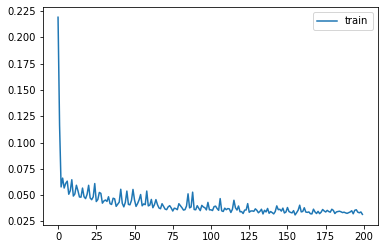

In [51]:
plt.plot(history.history['loss'], label='train')
plt.legend();
plt.show()

In [53]:
y_pred = model.predict(X_test)

# Reescalando o dado
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]

In [54]:
MSE_error = mean_squared_error(y_test, y_pred)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.12986712153332872


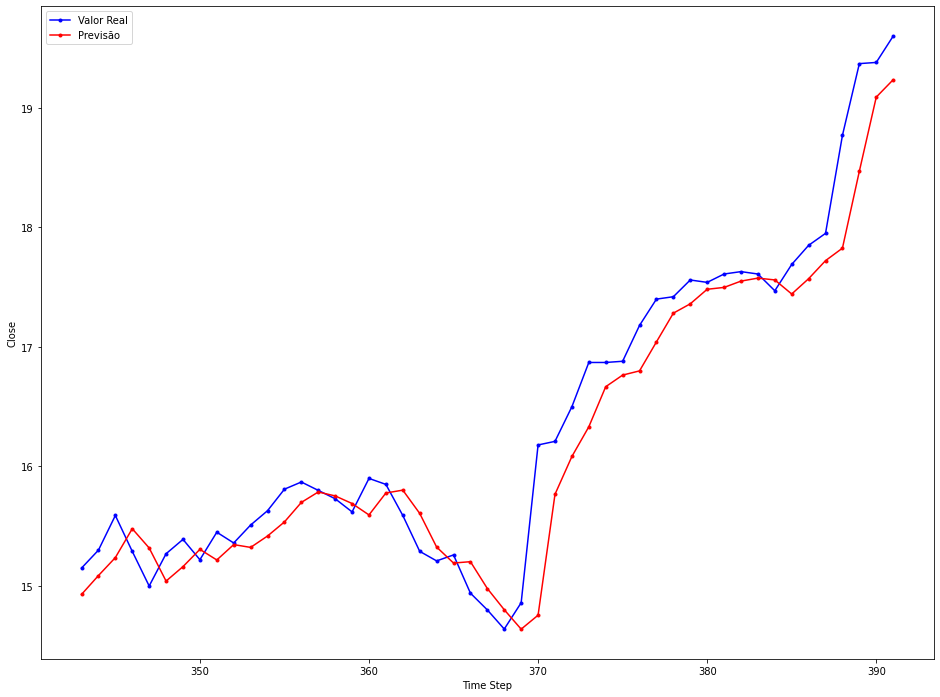

In [55]:
# Plotting the results
plt.figure(figsize=(16, 12))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), color='blue', marker='.', label="Valor Real")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'red', marker='.', label="Previsão")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show()

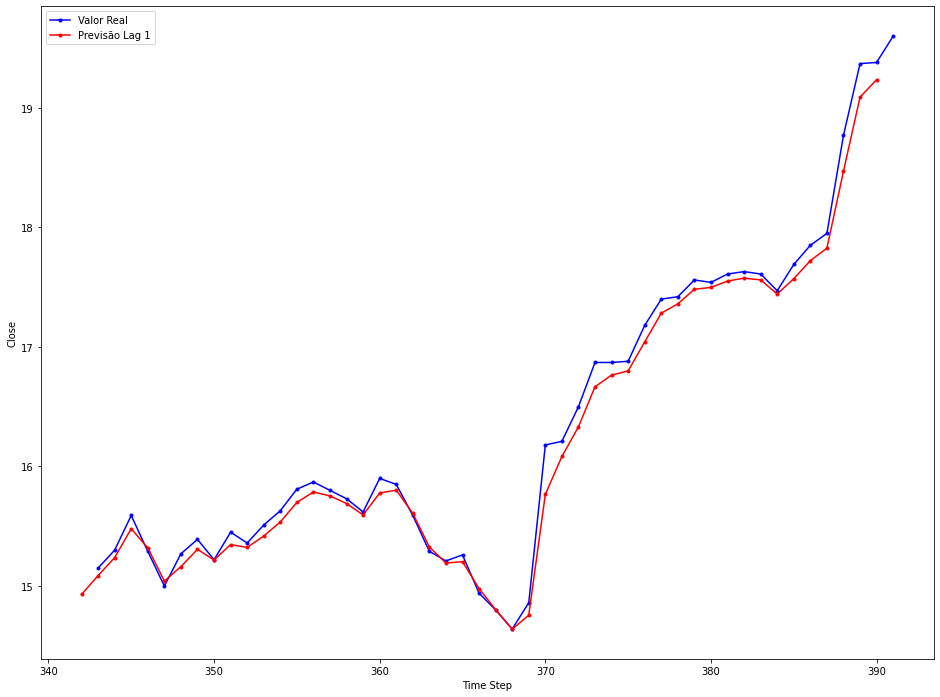

In [56]:
# Plotting the results
plt.figure(figsize=(16, 12))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), color='blue', marker='.', label="Valor Real")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test))-1, y_pred.flatten(), 'red', marker='.', label="Previsão Lag 1")
plt.ylabel('Close')
plt.xlabel('Time Step')
plt.legend()
plt.show()